Model 1: Multiple Linear Regression (MLR) model

[[-0.01838056  0.00385561  0.00797076]
 [ 0.05011286 -0.08151202 -0.01606303]]
a1--train 0.24913289608890532 0.008487494411787271
a1--test, 0.4037099918166287, 0.009125852444604841
b1--train 0.3938982415751566 0.02435216805401162
b1--test, 0.2550225861641233, 0.026004690722453535


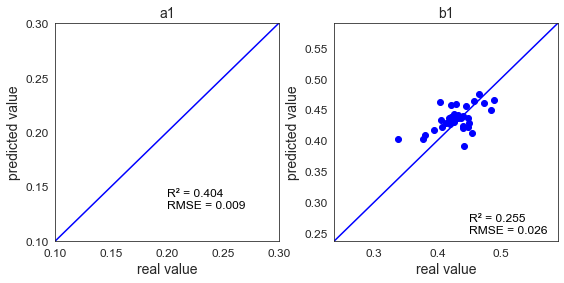

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib.ticker as ticker
from sklearn.metrics import mean_squared_error, mean_absolute_error

dir=r'C:\Users\Kelly\Documents\Boutput\test9-TP102站-1mm\做法4\a-b-海拔-经纬度-TP102站-对数.xlsx'
df = pd.read_excel(dir,sheet_name="cv")

# 经度、纬度、DEM
# 手动归一化：仅自变量
col=['经度','纬度','GTOPO30']
df[col] = (df[col] - df[col].min(axis=0)) / (df[col].max(axis=0) - df[col].min(axis=0))

# 训练集与验证集
list = np.arange(0,102,3)
train_data = df.drop(df.index[list],axis=0)
test_data = df.loc[list]

# 系数a1, b1
X1 = train_data[col]  
Y1 = train_data.iloc[:,1:3]
Y1a=train_data.iloc[:,1]
Y1b=train_data.iloc[:,2]
X2 = test_data[col] 
Y2 = test_data.iloc[:,1:3]
Y2a = test_data.iloc[:,1]
Y2b = test_data.iloc[:,2]

# model
model =LinearRegression(fit_intercept=True)
model.fit(X1,Y1)
Y1_fit = model.predict(X1)
Y1a_fit = Y1_fit[:,0]
Y1b_fit = Y1_fit[:,1]
Y2_fit = model.predict(X2)
Y2a_fit = Y2_fit[:,0]
Y2b_fit = Y2_fit[:,1]

# 散点图
# region
fig, ax = plt.subplots(1,2,figsize=(9,4))  # 创建两个空的子图，定义子图大小
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.25,hspace=0.4)
ax[0].scatter(Y2a,Y2a_fit, color="blue")
ax[0].plot([0.1,1],[0.1,1], color="blue")
# a1 = Y1.min()-0.1
# b1 = Y1.max()+0.1
ax[0].set_xlim(0.10,0.30)
ax[0].set_ylim(0.10,0.30)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax[0].set_title("a1",fontsize = 14)
ax[0].set_xlabel("real value",fontsize = 14)
ax[0].set_ylabel("predicted value",fontsize = 14)
ax[0].tick_params(labelsize=12) # 刻度字体大小12
R2_a=r2_score(Y2a,Y2a_fit)
RMSE_a=np.sqrt(mean_squared_error(Y2a,Y2a_fit))
ax[0].text(0.2, 0.13, f"R² = {R2_a.round(3)}\nRMSE = {RMSE_a.round(3)} ",  fontsize = 12, color ="black") 
ax[1].scatter(Y2b,Y2b_fit, color="blue")
ax[1].plot([0.1,1],[0.1,1], color="blue")
a2 = Y2b.min()-0.1
b2 = Y2b.max()+0.1
ax[1].set_xlim(a2,b2)
ax[1].set_ylim(a2,b2)
ax[1].set_title("b1",fontsize = 14)
ax[1].set_xlabel("real value",fontsize = 14)
ax[1].set_ylabel("predicted value",fontsize = 14)
ax[1].tick_params(labelsize=12) # 刻度字体大小12
R2_b=r2_score(Y2b,Y2b_fit)
RMSE_b=np.sqrt(mean_squared_error(Y2b,Y2b_fit))
ax[1].text(0.45, 0.25, f"R² = {R2_b.round(3)}\nRMSE = {RMSE_b.round(3)} ",fontsize = 12, color ="black") 
#endregion

print(model.coef_)
print("a1--train",r2_score(Y1a,Y1a_fit),np.sqrt(mean_squared_error(Y1a,Y1a_fit)))
print("a1--test",R2_a,RMSE_a,sep=", ")
print("b1--train",r2_score(Y1b,Y1b_fit),np.sqrt(mean_squared_error(Y1b,Y1b_fit)))
print("b1--test",R2_b,RMSE_b,sep=", ")
# 结果输出

writer = pd.ExcelWriter(r"C:\Users\Kelly\Documents\Boutput\test9-TP102站-1mm\tepres\ml3-topo.xlsx")
Y2_fit=pd.DataFrame(Y2_fit)
Y2_fit.to_excel(writer,"ML3",index=0,header=0)
writer.save()

Model 2: Support Vector Regression (SVR) model

2.1 parameters optimization

Optimal function value is: 0.135387; 
Optimal solution is:
[9.29667421e-01 4.18143963e-02 5.03030027e+01]


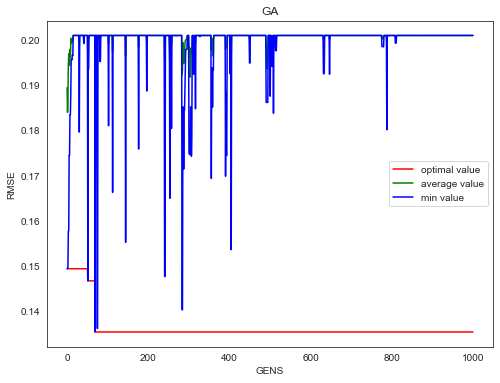

In [13]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.multioutput import RegressorChain
from math import sqrt
import matplotlib.ticker as ticker
from sklearn.metrics import mean_squared_error, mean_absolute_error

## 1、数据准备
# region
dir=r'C:\Users\Kelly\Documents\Boutput\test9-TP102站-1mm\做法4\a-b-海拔-经纬度-TP102站-对数.xlsx'
df = pd.read_excel(dir,sheet_name="cv")

# 手动归一化
col1=['a1','b1','经度','纬度','GTOPO30']  
X = df[col1]
df[col1] = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# 训练集与验证集
list = np.arange(0,102,3)
train_data = df.drop(df.index[list],axis=0) #68
test_data = df.loc[list]    #34
# 经度、纬度、DEM
col=['经度','纬度','GTOPO30']
# 系数a1，b1的训练集与验证集
X1 = train_data[col]  
Y1=train_data[["a1","b1"]]
Y1a = train_data.iloc[:,1]
Y1b = train_data.iloc[:,2]
X2 = test_data[col] 
Y2=test_data[["a1","b1"]]
Y2a = test_data.iloc[:,1]
Y2b = test_data.iloc[:,2]

X1=np.array(X1)
Y1=np.array(Y1)
Y1a=np.array(Y1a)
Y1b=np.array(Y1b)
X2=np.array(X2)
Y2=np.array(Y2)
Y2a=np.array(Y2a)
Y2b=np.array(Y2b)
# endregion

# GA参数优化：以RMSE为准
# region
#设置适应度，这里设置为RMSE
def msefunc(predictval,realval):
    # print("R2 = ",metrics.r2_score(realval,predictval)) # RMSE
    # return metrics.r2_score(realval,predictval)
    # print("RMSE = ",np.sqrt(mean_squared_error(realval,predictval))) # R2
    return np.sqrt(mean_squared_error(realval,predictval))

#设置优化函数，这里为SVR，参数在此绑定，使用验证集输入验证得出适应度
def SVMResult(vardim, x, bound):
    X = X1.tolist()
    y = Y1.tolist()    #######每一次运行模型，这里的a/b要进行变动
    c=x[0]
    e=x[1]
    g=x[2]
    clf0 = SVR(C=c,epsilon=e,gamma=g)
    clf = RegressorChain(clf0)
    clf.fit(X, y)
    predictval=clf.predict(X2.tolist())
    return msefunc(predictval,Y2.tolist()) #######每一次运行模型，这里的a/b要进行变动
# endregion
# region

class GAIndividual:
 
    '''
    individual of genetic algorithm
    '''
 
    def __init__(self,  vardim, bound):
        '''
        vardim: dimension of variables
        bound: boundaries of variables
        '''
        self.vardim = vardim
        self.bound = bound
        self.fitness = 0.
 
    def generate(self):
        '''
        generate a random chromsome for genetic algorithm
        随机生成染色体
        '''
        len = self.vardim
        rnd = np.random.random(size=len)
        self.chrom = np.zeros(len)
        for i in range(0, len):
            self.chrom[i] = self.bound[0, i] + \
                (self.bound[1, i] - self.bound[0, i]) * rnd[i]
 
    def calculateFitness(self):
        '''
        calculate the fitness of the chromsome
        '''
        self.fitness = SVMResult(self.vardim, self.chrom, self.bound)
        
import random
import copy

# 完整的GA算法
class GeneticAlgorithm:
 
    '''
    The class for genetic algorithm
    '''
 
    def __init__(self, sizepop, vardim, bound, MAXGEN, params):
        '''
        sizepop: population sizepop人口规模
        vardim: dimension of variables变量维数
        bound: boundaries of variables变量边界
        MAXGEN: termination condition终止条件
        param: algorithm required parameters, it is a list which is consisting of crossover rate, mutation rate, alpha
        '''
        self.sizepop = sizepop
        self.MAXGEN = MAXGEN
        self.vardim = vardim
        self.bound = bound
        self.population = []
        self.fitness = np.zeros((self.sizepop, 1))
        self.trace = np.zeros((self.MAXGEN, 3))
        self.params = params
 
    def initialize(self):
        '''
        initialize the population
        '''
        for i in range(0, self.sizepop):
            ind = GAIndividual(self.vardim, self.bound)
            ind.generate()
            self.population.append(ind)
 
    def evaluate(self):
        '''
        evaluation of the population fitnesses
        '''
        for i in range(0, self.sizepop):
            self.population[i].calculateFitness()
            self.fitness[i] = self.population[i].fitness
 
    def solve(self):
        '''
        evolution process of genetic algorithm
        '''
        self.t = 0
        self.initialize()
        self.evaluate()
        best = np.min(self.fitness)     # 特征函数最小化，对应前面第一段代码的RMSE
        bestIndex = np.argmin(self.fitness)
        self.best = copy.deepcopy(self.population[bestIndex])
        self.avefitness = np.mean(self.fitness)
        self.minfitness = np.min(self.fitness)
        
        self.trace[self.t, 0] =  self.best.fitness
        self.trace[self.t, 1] =  self.avefitness
        self.trace[self.t, 2] =  self.minfitness
        # print("Generation %d: optimal function value is: %f; average function value is %f;max function value is %f"% (
        #     self.t, self.trace[self.t, 0], self.trace[self.t, 1],self.trace[self.t, 2]))
        while (self.t < self.MAXGEN - 1):
            self.t += 1
            self.selectionOperation()
            self.crossoverOperation()
            self.mutationOperation()
            self.evaluate()
            best = np.min(self.fitness)
            bestIndex = np.argmin(self.fitness)
            if best < self.best.fitness:
                self.best = copy.deepcopy(self.population[bestIndex])
            self.avefitness = np.mean(self.fitness)
            self.minfitness = np.min(self.fitness)
            
            self.trace[self.t, 0] =  self.best.fitness
            self.trace[self.t, 1] = self.avefitness
            self.trace[self.t, 2] =  self.minfitness
            # print("Generation %d: optimal function value is: %f; average function value is %f;max function value is %f"% (
            # self.t, self.trace[self.t, 0], self.trace[self.t, 1],self.trace[self.t, 2]))
 
        print("Optimal function value is: %f; " %
              self.trace[self.t, 0])
        print ("Optimal solution is:")
        print (self.best.chrom)
        self.printResult()
 
    def selectionOperation(self):
        '''
        selection operation for Genetic Algorithm
        '''
        newpop = []
        totalFitness = np.sum(self.fitness)
        accuFitness = np.zeros((self.sizepop, 1))
 
        sum1 = 0.
        for i in range(0, self.sizepop):
            accuFitness[i] = sum1 + self.fitness[i] / totalFitness
            sum1 = accuFitness[i]
 
        for i in range(0, self.sizepop):
            r = random.random()
            idx = 0
            for j in range(0, self.sizepop - 1):
                if j == 0 and r < accuFitness[j]:
                    idx = 0
                    break
                elif r >= accuFitness[j] and r < accuFitness[j + 1]:
                    idx = j + 1
                    break
            newpop.append(self.population[idx])
        self.population = newpop
 
    def crossoverOperation(self):
        '''
        crossover operation for genetic algorithm
        '''
        newpop = []
        for i in range(0, self.sizepop, 2):
            idx1 = random.randint(0, self.sizepop - 1)
            idx2 = random.randint(0, self.sizepop - 1)
            while idx2 == idx1:
                idx2 = random.randint(0, self.sizepop - 1)
            newpop.append(copy.deepcopy(self.population[idx1]))
            newpop.append(copy.deepcopy(self.population[idx2]))
            r = random.random()
            if r < self.params[0]:
                crossPos = random.randint(1, self.vardim - 1)
                for j in range(crossPos, self.vardim):
                    newpop[i].chrom[j] = newpop[i].chrom[
                        j] * self.params[2] + (1 - self.params[2]) * newpop[i + 1].chrom[j]
                    newpop[i + 1].chrom[j] = newpop[i + 1].chrom[j] * self.params[2] + \
                        (1 - self.params[2]) * newpop[i].chrom[j]
        self.population = newpop
 
    def mutationOperation(self):
        '''
        mutation operation for genetic algorithm
        '''
        newpop = []
        for i in range(0, self.sizepop):
            newpop.append(copy.deepcopy(self.population[i]))
            r = random.random()
            if r < self.params[1]:
                mutatePos = random.randint(0, self.vardim - 1)
                theta = random.random()
                if theta > 0.5:
                    newpop[i].chrom[mutatePos] = newpop[i].chrom[
                        mutatePos] - (newpop[i].chrom[mutatePos] - self.bound[0, mutatePos]) * (1 - random.random() ** (1 - self.t / self.MAXGEN))
                else:
                    newpop[i].chrom[mutatePos] = newpop[i].chrom[
                        mutatePos] + (self.bound[1, mutatePos] - newpop[i].chrom[mutatePos]) * (1 - random.random() ** (1 - self.t / self.MAXGEN))
        self.population = newpop
 
    def printResult(self):
        '''
        plot the result of the genetic algorithm
        '''
        x = np.arange(0, self.MAXGEN)
        y1 = self.trace[:, 0]
        y2 = self.trace[:, 1]
        y3 = self.trace[:, 2]
        plt.plot(x, y1, 'r', label='optimal value')
        plt.plot(x, y2, 'g', label='average value')
        plt.plot(x, y3, 'b', label='min value')
        fig = plt.gcf()
        fig.set_size_inches(8, 6)
        plt.xlabel("GENS")
        plt.ylabel("RMSE")
        plt.title("GA")
        plt.legend()
        plt.savefig('SVM-topo-10.jpg',dpi=500)     
        plt.show()  
# endregion

if __name__ == "__main__":
   bound = np.array([[0,0,0],[10,2,100]])
   ga = GeneticAlgorithm(10, 3, bound, 1000, [0.9, 0.1, 0.5])
   ga.solve()



2.2 calibration and validation

In [14]:
from sklearn.svm import SVR
from sklearn.multioutput import RegressorChain
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import metrics
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.ticker as ticker
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
sns.set_style("white")

## 1、数据准备
# region
dir=r'C:\Users\Kelly\Documents\Boutput\test9-TP102站-1mm\做法4\a-b-海拔-经纬度-TP102站-对数.xlsx'
df = pd.read_excel(dir,sheet_name="cv")
col1=['a1','b1','经度','纬度','GTOPO30']  

X = df[col1]
m=X.min(axis=0)
n=X.max(axis=0)-X.min(axis=0)
df[col1] = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# 训练集与验证集
list = np.arange(0,102,3)
train_data = df.drop(df.index[list],axis=0) #68
test_data = df.loc[list]    #34
# 经度、纬度、DEM
col=['经度','纬度','GTOPO30']
# 系数a1，b1的训练集与验证集
X1 = train_data[col]  
Y1=train_data[["a1","b1"]]
Y1a = train_data.iloc[:,1]
Y1b = train_data.iloc[:,2]
X2 = test_data[col] 
Y2=test_data[["a1","b1"]]
Y2a = test_data.iloc[:,1]
Y2b = test_data.iloc[:,2]
# 反归一化
Y1a = Y1a*n[0:1].values+m[0:1].values
Y1b = Y1b*n[1:2].values+m[1:2].values
Y2a = Y2a*n[0:1].values+m[0:1].values
Y2b = Y2b*n[1:2].values+m[1:2].values
# endregion

df1 = pd.read_excel(r"C:\Users\Kelly\Documents\Boutput\test9-TP102站-1mm\tepres\paras.xlsx",sheet_name="SVM-topo-01",header=None)
res1=pd.DataFrame(columns=["R2a1","R2a2","R2b1","R2b2","RMSEa1","RMSEa2","RMSEb1","RMSEb2"])
res2=pd.DataFrame()
res3=pd.DataFrame()
# 训练模型
for i in range(10):
    model_svr0 = SVR(C= df1.iloc[i,0],epsilon=df1.iloc[i,1],gamma=df1.iloc[i,2])
    model_svr= RegressorChain(model_svr0)
    model_svr.fit(X1, Y1)
                    
    Y1_fit = model_svr.fit(X1,Y1).predict(X1)
    Y1a_fit = Y1_fit[:,0]
    Y1b_fit = Y1_fit[:,1]
    Y2_fit = model_svr.fit(X1,Y1).predict(X2)
    Y2a_fit = Y2_fit[:,0]
    Y2b_fit = Y2_fit[:,1]

    # 反归一化--回到原来的值，目的是为了制图
    Y1a_fit = Y1a_fit*n[0:1].values+m[0:1].values
    Y1b_fit = Y1b_fit*n[1:2].values+m[1:2].values
    Y2a_fit = Y2a_fit*n[0:1].values+m[0:1].values
    Y2b_fit = Y2b_fit*n[1:2].values+m[1:2].values
    
    Y1a_fit=pd.DataFrame(Y1a_fit,columns=["Y1afit"])
    Y1b_fit=pd.DataFrame(Y1b_fit,columns=["Y1bfit"])
    Y2a_fit=pd.DataFrame(Y2a_fit,columns=["Y2afit"])
    Y2b_fit=pd.DataFrame(Y2b_fit,columns=["Y2bfit"])
    
    score1=metrics.r2_score(Y1a,Y1a_fit)
    score2=metrics.r2_score(Y2a,Y2a_fit)
    score3=metrics.r2_score(Y1b,Y1b_fit)
    score4=metrics.r2_score(Y2b,Y2b_fit)
    score5=np.sqrt(mean_squared_error(Y1a,Y1a_fit))
    score6=np.sqrt(mean_squared_error(Y2a,Y2a_fit))
    score7=np.sqrt(mean_squared_error(Y1b,Y1b_fit))
    score8=np.sqrt(mean_squared_error(Y2b,Y2b_fit))
    
    new=pd.DataFrame({"R2a1":[score1]
                      ,"R2a2":[score2]
                      ,"R2b1":[score3]
                      ,"R2b2":[score4]
                      ,"RMSEa1":[score5]
                      ,"RMSEa2":[score6]
                      ,"RMSEb1":[score7]
                      ,"RMSEb2":[score8]
                          })
    res1=pd.concat([res1, new],axis=0)
    res2=pd.concat([res2, Y1a_fit,Y1b_fit, Y2a_fit, Y2b_fit],axis=1)
    res3=pd.concat([res3, Y2a_fit, Y2b_fit],axis=1)
res3.columns=['a1','b1','a2','b2','a3','b3','a4','b4','a5','b5',
            'a6','b6','a7','b7','a8','b8','a9','b9','a10','b10']
res3=res3.sort_index(axis=1)
res1.to_csv(r"C:\Users\Kelly\Documents\Boutput\test9-TP102站-1mm\tepres\svm_topo_评价指标.txt",index=False)
res2.to_csv(r"C:\Users\Kelly\Documents\Boutput\test9-TP102站-1mm\tepres\svm_topo_全部结果.txt",index=False)
res3.to_csv(r"C:\Users\Kelly\Documents\Boutput\test9-TP102站-1mm\tepres\svm_topo_验证结果.txt",index=False)



2.3 prediction

In [16]:
from sklearn.svm import SVR
from sklearn.multioutput import RegressorChain
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import metrics
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.ticker as ticker
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
sns.set_style("white")

## 1、数据准备
# region
dir=r'C:\Users\Kelly\Documents\Boutput\test9-TP102站-1mm\做法4\a-b-海拔-经纬度-TP102站-对数.xlsx'
df = pd.read_excel(dir,sheet_name="cv")
col1=['a1','b1','经度','纬度','GTOPO30']  
X = df[col1]
m=X.min(axis=0)
n=X.max(axis=0)-X.min(axis=0)
df[col1] = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# 训练集与验证集
list = np.arange(0,102,3)
train_data = df.drop(df.index[list],axis=0) #68
test_data = df.loc[list]    #34
# 经度、纬度、DEM
col=['经度','纬度','GTOPO30']
# 系数a1，b1的训练集与验证集
X1 = train_data[col]  
Y1=train_data[["a1","b1"]]
X2 = test_data[col] 
Y2=test_data[["a1","b1"]]

# endregion

# 预测
df2 = pd.read_csv(r"C:\Users\Kelly\Documents\Boutput\secpaper\tp_1km_gtopo30.txt",sep=",")
df2=(df2-m[2:5].values)/n[2:5].values #以102站的m,n为基准值，对经纬度海拔归一化
print(df2.head(5))
model_svr = SVR(C=3.80196085 ,epsilon=0.06169327,gamma=18.98435597)
# model_svr = SVR(C=8.79728719 ,epsilon=0.05104978,gamma=14.59024746)
# 8.7973 	0.0510 	14.5902 
# 3.80196085	0.06169327	18.98435597


model_svr= RegressorChain(model_svr)
svm3 = model_svr.fit(X1,Y1).predict(df2)
svm3=svm3*n[0:2].values+m[0:2].values          #对预测结果进行反归一化
svm3=pd.DataFrame(svm3,columns=["a1","b1"])
print(svm3.head(5))
df2=df2*n[2:5].values+m[2:5].values     # 对经纬度海拔进行反归一化
res=pd.concat([df2,svm3],axis=1)    # 将预测结果与对应的经纬度海拔合并，用于点转.shp

print(res.head(5))
res.to_csv(r"C:\Users\Kelly\Documents\Boutput\secpaper\res_svm3_ab_cv.txt",sep=",",index=False)


   longitude  latitude  altitude
0  -0.521833  0.653624  0.534872
1  -0.521833  0.652988  0.535658
2  -0.521833  0.652352  0.545884
3  -0.521483  0.656169  0.489512
4  -0.521483  0.655533  0.519140
         a1       b1
0 -0.131825  0.42921
1 -0.131825  0.42921
2 -0.131823  0.42921
3 -0.131833  0.42921
4 -0.131828  0.42921
   longitude   latitude  altitude        a1       b1
0  67.681092  34.979146    3320.0 -0.131825  0.42921
1  67.681092  34.970813    3323.0 -0.131825  0.42921
2  67.681092  34.962479    3362.0 -0.131823  0.42921
3  67.689426  35.012479    3147.0 -0.131833  0.42921
4  67.689426  35.004146    3260.0 -0.131828  0.42921


Model 3: Random Forest Regression (RFR) model

3.1 parameters optimization

In [16]:
import pandas as pd
import numpy as np
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold , cross_val_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib.ticker as ticker
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
sns.set_style("white")

# region

## 1、数据准备
df = pd.read_excel(r"F:\Boutput\test9-TP102站-1mm\a-b-海拔-经纬度-TP102站-对数.xlsx",sheet_name="Ⅰ类")
# 手动归一化：自变量因变量
# 经度、纬度、DEM
col1=['a1','b1','经度','纬度','GTOPO30'] 
m=df[col1].min(axis=0)
n=df[col1].max(axis=0)-df[col1].min(axis=0) 
df[col1] = (df[col1] - df[col1].min(axis=0)) / (df[col1].max(axis=0) - df[col1].min(axis=0))

# 获取102站的经纬度海拔--X，与系数ab--Y，用于Optuna参数寻优
col=['经度','纬度','GTOPO30'] 
X=df[col]
Y=df[["a1","b1"]]

# 训练集与验证集
list = np.arange(0,102,3)
train_data = df.drop(df.index[list],axis=0) #68
test_data = df.loc[list]    #34

# 系数a1，b1的训练集与验证集
X1 = train_data[col]
Y1 = train_data.iloc[:,1:3]  
Y1a = train_data.iloc[:,1]
Y1b = train_data.iloc[:,2]
X2 = test_data[col] 
Y2 = test_data.iloc[:,1:3]
Y2a = test_data.iloc[:,1]
Y2b = test_data.iloc[:,2]

print(X1.shape)
print(X2.shape)

## 2、超参数优化
res1=pd.DataFrame(columns=["order","n","depth","split","leaf","rmse"])
for i in range(10):
    random_seed=np.random.randint(low=1,high=100)
    def objective(trial):
        # 超参数范围设置
        n_estimators_range=trial.suggest_int('n_estimators_range',50,1000) # 树的数量
        max_features_range=trial.suggest_categorical('max_features_range',['auto','sqrt'])  # 最大分离特征数
        max_depth_range=trial.suggest_int('max_depth_range',50,1000)    # 最大深度
        min_samples_split_range=trial.suggest_int('min_samples_split_range',2,10)    # 最小分离样本数
        min_samples_leaf_range=trial.suggest_int('min_samples_leaf_range',1,8)    # 最小叶子节点样本数（即一个叶节点所需包含的最小样本数）
        # 模型设置
        model_base3 = RandomForestRegressor(n_estimators=n_estimators_range,
                                        max_features=max_features_range,
                                        max_depth=max_depth_range,
                                        min_samples_split=min_samples_split_range,
                                        min_samples_leaf=min_samples_leaf_range,
                                        bootstrap=True,
                                        random_state=random_seed)
        # 模型得分
        score = cross_val_score(model_base3, X,Y, n_jobs=-1, cv=3,scoring="neg_mean_squared_error")  #
        accuracy = score.mean()
        return accuracy
    
    if __name__ == "__main__":
        study = optuna.create_study(direction="maximize")
        study.optimize(objective, n_trials=1000)
        print(study.best_trial)
        
    #输出最优参数组合
    value=study.best_params
    print(value)
    #输出最优参数组合下的模型得分
    score=study.best_value
    print(study.best_value)
    #将结果输出为dataframe
    res2=study.trials_dataframe()
    name=f"F:\\vscode\\secpaper\\rf{i}.txt"
    res2.to_csv(name,index=False)

    # 参数random_state：有放回抽样时随机选取样本的随机数种子
    n=value["n_estimators_range"]
    depth=value["max_depth_range"]
    leaf=value["min_samples_leaf_range"]
    split=value["min_samples_split_range"]
    print(f"the best paras are: n={n},depth={depth},split={split},leaf={leaf}")
    new=pd.DataFrame({"order":[i],
                      "n":[n]
                      ,"depth":[depth]
                      ,"split":[split]
                      ,"leaf":[leaf]
                      ,"rmse":[score]
                      })
    res1=pd.concat([res1,new],axis=0)
res1.to_csv(r"F:\vscode\secpaper\1mm\rf_3因子_参数.txt",index=False)

# endregion




[I 2022-11-14 22:50:15,162] A new study created in memory with name: no-name-25bd8307-c95f-4c98-a5f6-b36dae5159bd


(68, 3)
(34, 3)


[I 2022-11-14 22:50:18,745] Trial 0 finished with value: -0.026957828001400442 and parameters: {'n_estimators_range': 448, 'max_features_range': 'auto', 'max_depth_range': 988, 'min_samples_split_range': 4, 'min_samples_leaf_range': 4}. Best is trial 0 with value: -0.026957828001400442.
[I 2022-11-14 22:50:19,548] Trial 1 finished with value: -0.02874109478010582 and parameters: {'n_estimators_range': 293, 'max_features_range': 'sqrt', 'max_depth_range': 549, 'min_samples_split_range': 7, 'min_samples_leaf_range': 6}. Best is trial 0 with value: -0.026957828001400442.
[I 2022-11-14 22:50:20,647] Trial 2 finished with value: -0.027765807385933493 and parameters: {'n_estimators_range': 963, 'max_features_range': 'sqrt', 'max_depth_range': 794, 'min_samples_split_range': 6, 'min_samples_leaf_range': 3}. Best is trial 0 with value: -0.026957828001400442.
[I 2022-11-14 22:50:21,765] Trial 3 finished with value: -0.028736668001566157 and parameters: {'n_estimators_range': 952, 'max_features_

FrozenTrial(number=623, values=[-0.02435385102411253], datetime_start=datetime.datetime(2022, 11, 14, 22, 53, 15, 528392), datetime_complete=datetime.datetime(2022, 11, 14, 22, 53, 15, 577240), params={'n_estimators_range': 64, 'max_features_range': 'sqrt', 'max_depth_range': 139, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}, distributions={'n_estimators_range': IntDistribution(high=1000, log=False, low=50, step=1), 'max_features_range': CategoricalDistribution(choices=('auto', 'sqrt')), 'max_depth_range': IntDistribution(high=1000, log=False, low=50, step=1), 'min_samples_split_range': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf_range': IntDistribution(high=8, log=False, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=623, state=TrialState.COMPLETE, value=None)
{'n_estimators_range': 64, 'max_features_range': 'sqrt', 'max_depth_range': 139, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}
-0.0243538510

[I 2022-11-14 22:53:48,252] Trial 1 finished with value: -0.02726392975774697 and parameters: {'n_estimators_range': 51, 'max_features_range': 'auto', 'max_depth_range': 845, 'min_samples_split_range': 5, 'min_samples_leaf_range': 5}. Best is trial 0 with value: -0.025511812955210284.
[I 2022-11-14 22:53:48,576] Trial 2 finished with value: -0.028835870444067897 and parameters: {'n_estimators_range': 807, 'max_features_range': 'sqrt', 'max_depth_range': 201, 'min_samples_split_range': 2, 'min_samples_leaf_range': 6}. Best is trial 0 with value: -0.025511812955210284.
[I 2022-11-14 22:53:48,824] Trial 3 finished with value: -0.02689917338913486 and parameters: {'n_estimators_range': 544, 'max_features_range': 'auto', 'max_depth_range': 977, 'min_samples_split_range': 8, 'min_samples_leaf_range': 2}. Best is trial 0 with value: -0.025511812955210284.
[I 2022-11-14 22:53:49,074] Trial 4 finished with value: -0.028684333799000844 and parameters: {'n_estimators_range': 585, 'max_features_ra

FrozenTrial(number=414, values=[-0.02350344314984021], datetime_start=datetime.datetime(2022, 11, 14, 22, 54, 41, 22122), datetime_complete=datetime.datetime(2022, 11, 14, 22, 54, 41, 63635), params={'n_estimators_range': 52, 'max_features_range': 'auto', 'max_depth_range': 665, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}, distributions={'n_estimators_range': IntDistribution(high=1000, log=False, low=50, step=1), 'max_features_range': CategoricalDistribution(choices=('auto', 'sqrt')), 'max_depth_range': IntDistribution(high=1000, log=False, low=50, step=1), 'min_samples_split_range': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf_range': IntDistribution(high=8, log=False, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=414, state=TrialState.COMPLETE, value=None)
{'n_estimators_range': 52, 'max_features_range': 'auto', 'max_depth_range': 665, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}
-0.023503443149

[I 2022-11-14 22:55:25,874] Trial 1 finished with value: -0.028533893914451835 and parameters: {'n_estimators_range': 363, 'max_features_range': 'sqrt', 'max_depth_range': 392, 'min_samples_split_range': 4, 'min_samples_leaf_range': 6}. Best is trial 0 with value: -0.026383203566808493.
[I 2022-11-14 22:55:26,033] Trial 2 finished with value: -0.028134189167611432 and parameters: {'n_estimators_range': 371, 'max_features_range': 'sqrt', 'max_depth_range': 464, 'min_samples_split_range': 9, 'min_samples_leaf_range': 5}. Best is trial 0 with value: -0.026383203566808493.
[I 2022-11-14 22:55:26,229] Trial 3 finished with value: -0.02714870997471221 and parameters: {'n_estimators_range': 476, 'max_features_range': 'sqrt', 'max_depth_range': 759, 'min_samples_split_range': 5, 'min_samples_leaf_range': 2}. Best is trial 0 with value: -0.026383203566808493.
[I 2022-11-14 22:55:26,453] Trial 4 finished with value: -0.027142834389091805 and parameters: {'n_estimators_range': 537, 'max_features_

FrozenTrial(number=31, values=[-0.024477599944622303], datetime_start=datetime.datetime(2022, 11, 14, 22, 55, 30, 420084), datetime_complete=datetime.datetime(2022, 11, 14, 22, 55, 30, 497827), params={'n_estimators_range': 145, 'max_features_range': 'auto', 'max_depth_range': 603, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}, distributions={'n_estimators_range': IntDistribution(high=1000, log=False, low=50, step=1), 'max_features_range': CategoricalDistribution(choices=('auto', 'sqrt')), 'max_depth_range': IntDistribution(high=1000, log=False, low=50, step=1), 'min_samples_split_range': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf_range': IntDistribution(high=8, log=False, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=31, state=TrialState.COMPLETE, value=None)
{'n_estimators_range': 145, 'max_features_range': 'auto', 'max_depth_range': 603, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}
-0.024477599

[I 2022-11-14 22:57:40,855] Trial 0 finished with value: -0.026695342616092937 and parameters: {'n_estimators_range': 449, 'max_features_range': 'auto', 'max_depth_range': 103, 'min_samples_split_range': 7, 'min_samples_leaf_range': 4}. Best is trial 0 with value: -0.026695342616092937.
[I 2022-11-14 22:57:41,272] Trial 1 finished with value: -0.02673372294411421 and parameters: {'n_estimators_range': 866, 'max_features_range': 'sqrt', 'max_depth_range': 145, 'min_samples_split_range': 4, 'min_samples_leaf_range': 1}. Best is trial 0 with value: -0.026695342616092937.
[I 2022-11-14 22:57:41,455] Trial 2 finished with value: -0.025937825604497033 and parameters: {'n_estimators_range': 356, 'max_features_range': 'auto', 'max_depth_range': 372, 'min_samples_split_range': 3, 'min_samples_leaf_range': 1}. Best is trial 2 with value: -0.025937825604497033.
[I 2022-11-14 22:57:41,748] Trial 3 finished with value: -0.02856255351655355 and parameters: {'n_estimators_range': 733, 'max_features_r

FrozenTrial(number=259, values=[-0.02478213343165891], datetime_start=datetime.datetime(2022, 11, 14, 22, 58, 14, 591526), datetime_complete=datetime.datetime(2022, 11, 14, 22, 58, 14, 641225), params={'n_estimators_range': 79, 'max_features_range': 'auto', 'max_depth_range': 181, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}, distributions={'n_estimators_range': IntDistribution(high=1000, log=False, low=50, step=1), 'max_features_range': CategoricalDistribution(choices=('auto', 'sqrt')), 'max_depth_range': IntDistribution(high=1000, log=False, low=50, step=1), 'min_samples_split_range': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf_range': IntDistribution(high=8, log=False, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=259, state=TrialState.COMPLETE, value=None)
{'n_estimators_range': 79, 'max_features_range': 'auto', 'max_depth_range': 181, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}
-0.0247821334

[I 2022-11-14 22:59:16,947] Trial 0 finished with value: -0.027924882956631026 and parameters: {'n_estimators_range': 955, 'max_features_range': 'sqrt', 'max_depth_range': 378, 'min_samples_split_range': 2, 'min_samples_leaf_range': 4}. Best is trial 0 with value: -0.027924882956631026.
[I 2022-11-14 22:59:17,205] Trial 1 finished with value: -0.026461484498228636 and parameters: {'n_estimators_range': 524, 'max_features_range': 'auto', 'max_depth_range': 168, 'min_samples_split_range': 6, 'min_samples_leaf_range': 2}. Best is trial 1 with value: -0.026461484498228636.
[I 2022-11-14 22:59:17,456] Trial 2 finished with value: -0.027422699309260844 and parameters: {'n_estimators_range': 551, 'max_features_range': 'auto', 'max_depth_range': 174, 'min_samples_split_range': 10, 'min_samples_leaf_range': 3}. Best is trial 1 with value: -0.026461484498228636.
[I 2022-11-14 22:59:17,866] Trial 3 finished with value: -0.02727219470474922 and parameters: {'n_estimators_range': 880, 'max_features

FrozenTrial(number=324, values=[-0.023975702714335387], datetime_start=datetime.datetime(2022, 11, 14, 22, 59, 43, 612980), datetime_complete=datetime.datetime(2022, 11, 14, 22, 59, 43, 657827), params={'n_estimators_range': 54, 'max_features_range': 'auto', 'max_depth_range': 222, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}, distributions={'n_estimators_range': IntDistribution(high=1000, log=False, low=50, step=1), 'max_features_range': CategoricalDistribution(choices=('auto', 'sqrt')), 'max_depth_range': IntDistribution(high=1000, log=False, low=50, step=1), 'min_samples_split_range': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf_range': IntDistribution(high=8, log=False, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=324, state=TrialState.COMPLETE, value=None)
{'n_estimators_range': 54, 'max_features_range': 'auto', 'max_depth_range': 222, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}
-0.023975702

[I 2022-11-14 23:00:37,478] Trial 0 finished with value: -0.028741032806015015 and parameters: {'n_estimators_range': 834, 'max_features_range': 'sqrt', 'max_depth_range': 252, 'min_samples_split_range': 9, 'min_samples_leaf_range': 6}. Best is trial 0 with value: -0.028741032806015015.
[I 2022-11-14 23:00:37,678] Trial 1 finished with value: -0.026999094783820028 and parameters: {'n_estimators_range': 471, 'max_features_range': 'auto', 'max_depth_range': 886, 'min_samples_split_range': 5, 'min_samples_leaf_range': 4}. Best is trial 1 with value: -0.026999094783820028.
[I 2022-11-14 23:00:37,809] Trial 2 finished with value: -0.029105888402757758 and parameters: {'n_estimators_range': 310, 'max_features_range': 'auto', 'max_depth_range': 279, 'min_samples_split_range': 10, 'min_samples_leaf_range': 8}. Best is trial 1 with value: -0.026999094783820028.
[I 2022-11-14 23:00:38,082] Trial 3 finished with value: -0.028916306108973625 and parameters: {'n_estimators_range': 594, 'max_feature

FrozenTrial(number=120, values=[-0.02455286995514917], datetime_start=datetime.datetime(2022, 11, 14, 23, 0, 51, 105817), datetime_complete=datetime.datetime(2022, 11, 14, 23, 0, 51, 196968), params={'n_estimators_range': 175, 'max_features_range': 'auto', 'max_depth_range': 562, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}, distributions={'n_estimators_range': IntDistribution(high=1000, log=False, low=50, step=1), 'max_features_range': CategoricalDistribution(choices=('auto', 'sqrt')), 'max_depth_range': IntDistribution(high=1000, log=False, low=50, step=1), 'min_samples_split_range': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf_range': IntDistribution(high=8, log=False, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=120, state=TrialState.COMPLETE, value=None)
{'n_estimators_range': 175, 'max_features_range': 'auto', 'max_depth_range': 562, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}
-0.0245528699

[I 2022-11-14 23:02:37,134] Trial 1 finished with value: -0.029444686307386708 and parameters: {'n_estimators_range': 584, 'max_features_range': 'auto', 'max_depth_range': 294, 'min_samples_split_range': 3, 'min_samples_leaf_range': 8}. Best is trial 0 with value: -0.028804008395222704.
[I 2022-11-14 23:02:37,229] Trial 2 finished with value: -0.02808831701167527 and parameters: {'n_estimators_range': 190, 'max_features_range': 'auto', 'max_depth_range': 318, 'min_samples_split_range': 8, 'min_samples_leaf_range': 6}. Best is trial 2 with value: -0.02808831701167527.
[I 2022-11-14 23:02:37,503] Trial 3 finished with value: -0.027404719780051004 and parameters: {'n_estimators_range': 636, 'max_features_range': 'auto', 'max_depth_range': 816, 'min_samples_split_range': 5, 'min_samples_leaf_range': 5}. Best is trial 3 with value: -0.027404719780051004.
[I 2022-11-14 23:02:37,870] Trial 4 finished with value: -0.0258222346033052 and parameters: {'n_estimators_range': 782, 'max_features_ran

FrozenTrial(number=139, values=[-0.024580906964433963], datetime_start=datetime.datetime(2022, 11, 14, 23, 3, 16, 859794), datetime_complete=datetime.datetime(2022, 11, 14, 23, 3, 17, 220590), params={'n_estimators_range': 776, 'max_features_range': 'auto', 'max_depth_range': 877, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}, distributions={'n_estimators_range': IntDistribution(high=1000, log=False, low=50, step=1), 'max_features_range': CategoricalDistribution(choices=('auto', 'sqrt')), 'max_depth_range': IntDistribution(high=1000, log=False, low=50, step=1), 'min_samples_split_range': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf_range': IntDistribution(high=8, log=False, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=139, state=TrialState.COMPLETE, value=None)
{'n_estimators_range': 776, 'max_features_range': 'auto', 'max_depth_range': 877, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}
-0.024580906

[I 2022-11-14 23:08:36,261] Trial 1 finished with value: -0.027227580950349606 and parameters: {'n_estimators_range': 496, 'max_features_range': 'auto', 'max_depth_range': 762, 'min_samples_split_range': 9, 'min_samples_leaf_range': 3}. Best is trial 1 with value: -0.027227580950349606.
[I 2022-11-14 23:08:36,301] Trial 2 finished with value: -0.026790953768033237 and parameters: {'n_estimators_range': 68, 'max_features_range': 'auto', 'max_depth_range': 634, 'min_samples_split_range': 6, 'min_samples_leaf_range': 1}. Best is trial 2 with value: -0.026790953768033237.
[I 2022-11-14 23:08:36,371] Trial 3 finished with value: -0.029124356020496688 and parameters: {'n_estimators_range': 149, 'max_features_range': 'sqrt', 'max_depth_range': 936, 'min_samples_split_range': 8, 'min_samples_leaf_range': 3}. Best is trial 2 with value: -0.026790953768033237.
[I 2022-11-14 23:08:36,534] Trial 4 finished with value: -0.027587195956361995 and parameters: {'n_estimators_range': 383, 'max_features_

FrozenTrial(number=870, values=[-0.024538428537627433], datetime_start=datetime.datetime(2022, 11, 14, 23, 11, 21, 825921), datetime_complete=datetime.datetime(2022, 11, 14, 23, 11, 21, 879419), params={'n_estimators_range': 50, 'max_features_range': 'auto', 'max_depth_range': 925, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}, distributions={'n_estimators_range': IntDistribution(high=1000, log=False, low=50, step=1), 'max_features_range': CategoricalDistribution(choices=('auto', 'sqrt')), 'max_depth_range': IntDistribution(high=1000, log=False, low=50, step=1), 'min_samples_split_range': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf_range': IntDistribution(high=8, log=False, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=870, state=TrialState.COMPLETE, value=None)
{'n_estimators_range': 50, 'max_features_range': 'auto', 'max_depth_range': 925, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}
-0.024538428

[I 2022-11-14 23:11:31,549] Trial 0 finished with value: -0.02912276440469262 and parameters: {'n_estimators_range': 561, 'max_features_range': 'sqrt', 'max_depth_range': 182, 'min_samples_split_range': 10, 'min_samples_leaf_range': 8}. Best is trial 0 with value: -0.02912276440469262.
[I 2022-11-14 23:11:31,943] Trial 1 finished with value: -0.02814121609918241 and parameters: {'n_estimators_range': 891, 'max_features_range': 'sqrt', 'max_depth_range': 56, 'min_samples_split_range': 10, 'min_samples_leaf_range': 5}. Best is trial 1 with value: -0.02814121609918241.
[I 2022-11-14 23:11:32,034] Trial 2 finished with value: -0.026352463140462603 and parameters: {'n_estimators_range': 201, 'max_features_range': 'sqrt', 'max_depth_range': 423, 'min_samples_split_range': 5, 'min_samples_leaf_range': 1}. Best is trial 2 with value: -0.026352463140462603.
[I 2022-11-14 23:11:32,253] Trial 3 finished with value: -0.029220877606409207 and parameters: {'n_estimators_range': 533, 'max_features_ra

FrozenTrial(number=181, values=[-0.024633794039040965], datetime_start=datetime.datetime(2022, 11, 14, 23, 12, 1, 768678), datetime_complete=datetime.datetime(2022, 11, 14, 23, 12, 1, 947932), params={'n_estimators_range': 325, 'max_features_range': 'auto', 'max_depth_range': 185, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}, distributions={'n_estimators_range': IntDistribution(high=1000, log=False, low=50, step=1), 'max_features_range': CategoricalDistribution(choices=('auto', 'sqrt')), 'max_depth_range': IntDistribution(high=1000, log=False, low=50, step=1), 'min_samples_split_range': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf_range': IntDistribution(high=8, log=False, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=181, state=TrialState.COMPLETE, value=None)
{'n_estimators_range': 325, 'max_features_range': 'auto', 'max_depth_range': 185, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}
-0.024633794

[I 2022-11-14 23:14:28,604] Trial 0 finished with value: -0.027626373024544255 and parameters: {'n_estimators_range': 879, 'max_features_range': 'sqrt', 'max_depth_range': 664, 'min_samples_split_range': 10, 'min_samples_leaf_range': 2}. Best is trial 0 with value: -0.027626373024544255.
[I 2022-11-14 23:14:28,809] Trial 1 finished with value: -0.025323923006889345 and parameters: {'n_estimators_range': 337, 'max_features_range': 'auto', 'max_depth_range': 806, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}. Best is trial 1 with value: -0.025323923006889345.
[I 2022-11-14 23:14:29,120] Trial 2 finished with value: -0.028178917022980417 and parameters: {'n_estimators_range': 784, 'max_features_range': 'sqrt', 'max_depth_range': 408, 'min_samples_split_range': 8, 'min_samples_leaf_range': 5}. Best is trial 1 with value: -0.025323923006889345.
[I 2022-11-14 23:14:29,451] Trial 3 finished with value: -0.02657223800225061 and parameters: {'n_estimators_range': 791, 'max_features

FrozenTrial(number=244, values=[-0.024479876349623935], datetime_start=datetime.datetime(2022, 11, 14, 23, 14, 56, 710937), datetime_complete=datetime.datetime(2022, 11, 14, 23, 14, 56, 806538), params={'n_estimators_range': 167, 'max_features_range': 'auto', 'max_depth_range': 398, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}, distributions={'n_estimators_range': IntDistribution(high=1000, log=False, low=50, step=1), 'max_features_range': CategoricalDistribution(choices=('auto', 'sqrt')), 'max_depth_range': IntDistribution(high=1000, log=False, low=50, step=1), 'min_samples_split_range': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf_range': IntDistribution(high=8, log=False, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=244, state=TrialState.COMPLETE, value=None)
{'n_estimators_range': 167, 'max_features_range': 'auto', 'max_depth_range': 398, 'min_samples_split_range': 2, 'min_samples_leaf_range': 1}
-0.0244798

3.2 calibration and validation

In [17]:
import pandas as pd
import numpy as np
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold , cross_val_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib.ticker as ticker
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
sns.set_style("white")



## 1、数据准备
# region
df = pd.read_excel(r"F:\Boutput\test9-TP102站-1mm\a-b-海拔-经纬度-TP102站-对数.xlsx",sheet_name="Ⅰ类")
# 手动归一化：自变量因变量
# 经度、纬度、DEM
col1=['a1','b1','经度','纬度','GTOPO30'] 
m=df[col1].min(axis=0)
n=df[col1].max(axis=0)-df[col1].min(axis=0) 
df[col1] = (df[col1] - df[col1].min(axis=0)) / (df[col1].max(axis=0) - df[col1].min(axis=0))

# 获取102站的经纬度海拔--X，与系数ab--Y，用于Optuna参数寻优
col=['经度','纬度','GTOPO30'] 
X=df[col]
Y=df[["a1","b1"]]

# 训练集与验证集
list = np.arange(0,102,3)
train_data = df.drop(df.index[list],axis=0) #68
test_data = df.loc[list]    #34

# 系数a1，b1的训练集与验证集
X1 = train_data[col]
Y1 = train_data.iloc[:,1:3]  
Y1a = train_data.iloc[:,1]
Y1b = train_data.iloc[:,2]
X2 = test_data[col] 
Y2 = test_data.iloc[:,1:3]
Y2a = test_data.iloc[:,1]
Y2b = test_data.iloc[:,2]

# 反归一化
Y1a = Y1a*n[0:1].values+m[0:1].values
Y1b = Y1b*n[1:2].values+m[1:2].values
Y2a = Y2a*n[0:1].values+m[0:1].values
Y2b = Y2b*n[1:2].values+m[1:2].values

print(X1.shape)
print(X2.shape)
# endregion

df=pd.read_csv(r"F:\vscode\secpaper\1mm\rf_3因子_参数.txt",)
res1=pd.DataFrame(columns=["R2a1","R2a2","R2b1","R2b2","RMSEa1","RMSEa2","RMSEb1","RMSEb2"])
res2=pd.DataFrame()

for i in range(10):
    random_seed=np.random.randint(low=1,high=100)
    model_rf = RandomForestRegressor(n_estimators=df.iloc[i,1],
                                max_depth=df.iloc[i,2],
                                bootstrap=True,
                                min_samples_leaf=df.iloc[i,4],
                                min_samples_split=df.iloc[i,3],
                                random_state=random_seed)
    model_rf.fit(X1,Y1)

    Y1_fit = model_rf.predict(X1)
    Y1a_fit = Y1_fit[:,0]
    Y1b_fit = Y1_fit[:,1]
    Y2_fit = model_rf.predict(X2)
    Y2a_fit = Y2_fit[:,0]
    Y2b_fit = Y2_fit[:,1]

    # 反归一化--回到原来的值，目的是为了制图

    Y1a_fit = Y1a_fit*n[0:1].values+m[0:1].values
    Y1b_fit = Y1b_fit*n[1:2].values+m[1:2].values
    Y2a_fit = Y2a_fit*n[0:1].values+m[0:1].values
    Y2b_fit = Y2b_fit*n[1:2].values+m[1:2].values

    Y1a_fit=pd.DataFrame(Y1a_fit,columns=["Y1afit"])
    Y1b_fit=pd.DataFrame(Y1b_fit,columns=["Y1bfit"])
    Y2a_fit=pd.DataFrame(Y2a_fit,columns=["Y2afit"])
    Y2b_fit=pd.DataFrame(Y2b_fit,columns=["Y2bfit"])

    score1=metrics.r2_score(Y1a,Y1a_fit)
    score2=metrics.r2_score(Y2a,Y2a_fit)
    score3=metrics.r2_score(Y1b,Y1b_fit)
    score4=metrics.r2_score(Y2b,Y2b_fit)
    score5=np.sqrt(mean_squared_error(Y1a,Y1a_fit))
    score6=np.sqrt(mean_squared_error(Y2a,Y2a_fit))
    score7=np.sqrt(mean_squared_error(Y1b,Y1b_fit))
    score8=np.sqrt(mean_squared_error(Y2b,Y2b_fit))

    new=pd.DataFrame({"R2a1":[score1]
                        ,"R2a2":[score2]
                        ,"R2b1":[score3]
                        ,"R2b2":[score4]
                        ,"RMSEa1":[score5]
                        ,"RMSEa2":[score6]
                        ,"RMSEb1":[score7]
                        ,"RMSEb2":[score8]
                            })
    res1=pd.concat([res1, new],axis=0)
    res2=pd.concat([res2, Y1a_fit,Y1b_fit, Y2a_fit, Y2b_fit],axis=1)

res1.to_csv(r"F:\vscode\secpaper\1mm\rf_3因子_评价指标.txt",index=False)
res2.to_csv(r"F:\vscode\secpaper\1mm\rf_3因子_结果.txt",index=False)

(68, 3)
(34, 3)
